## ResNet (DNN) Example for Fashion MNIST Dataset

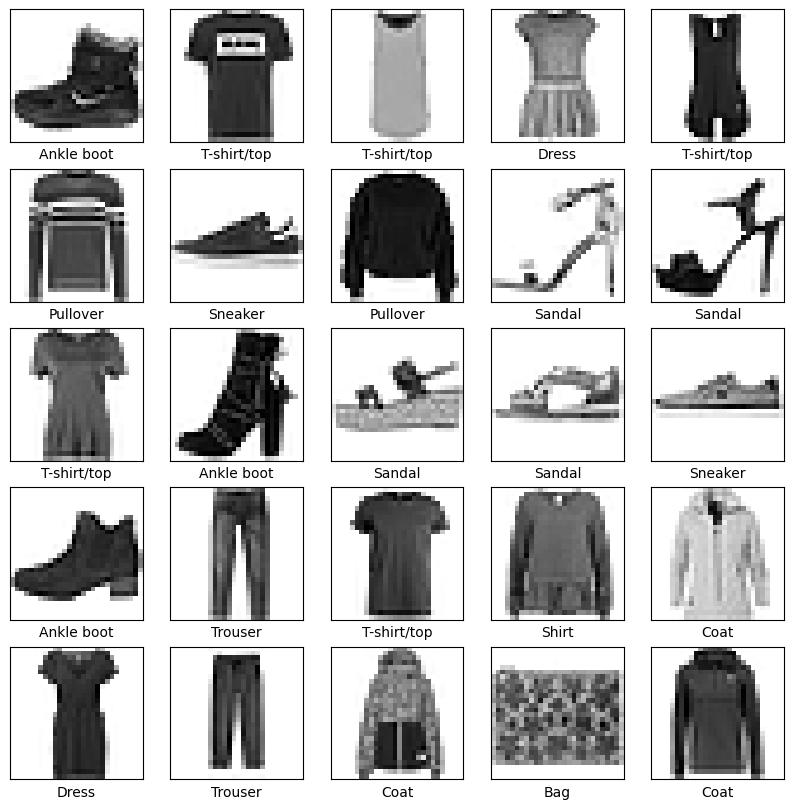

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten the images for DNN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Visualize some samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [2]:

from tensorflow.keras.layers import Dropout, BatchNormalization

def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(512)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)


In [3]:
def create_resnet_dnn():
    inputs = Input(shape=(784,))

    # Initial dense layer
    x = Dense(256, activation='relu')(inputs)

    # Residual block 1
    x1 = Dense(256, activation='relu')(x)
    x2 = Dense(256, activation='relu')(x1)
    res1 = Add()([x, x2])  # Skip connection
    res1 = Activation('relu')(res1)

    # Residual block 2
    x3 = Dense(128, activation='relu')(res1)
    x4 = Dense(128, activation='relu')(x3)
    res1_down = Dense(128, activation='relu')(res1)
    res2 = Add()([res1_down, x4])
    res2 = Activation('relu')(res2)

    x_final = Dense(64, activation='relu')(res2)
    outputs = Dense(10, activation='softmax')(x_final)

    return Model(inputs, outputs)


In [4]:
# Create and compile models
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_dnn_model.h5", save_best_only=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

dnn_history = dnn_model.fit(x_train_flat, y_train,
                            epochs=50,
                            batch_size=128,
                            validation_split=0.2,
                            callbacks=[early_stop, checkpoint, lr_scheduler],
                            verbose=1)


Epoch 1/50
361/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7320 - loss: 0.8009

375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7346 - loss: 0.7923 - val_accuracy: 0.8472 - val_loss: 0.4148 - learning_rate: 0.0010
Epoch 2/50
358/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - loss: 0.4292

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8456 - loss: 0.4288 - val_accuracy: 0.8708 - val_loss: 0.3571 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8619 - loss: 0.3789 - val_accuracy: 0.8446 - val_loss: 0.4223 - learning_rate: 0.0010
Epoch 4/50
364/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8732 - loss: 0.3479

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8731 - loss: 0.3480 - val_accuracy: 0.8655 - val_loss: 0.3530 - learning_rate: 0.0010
Epoch 5/50
360/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8766 - loss: 0.3328

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8766 - loss: 0.3329 - val_accuracy: 0.8806 - val_loss: 0.3297 - learning_rate: 0.0010
Epoch 6/50
371/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8852 - loss: 0.3119

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8851 - loss: 0.3120 - val_accuracy: 0.8823 - val_loss: 0.3195 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8875 - loss: 0.3033 - val_accuracy: 0.8823 - val_loss: 0.3243 - learning_rate: 0.0010
Epoch 8/50
359/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8904 - loss: 0.2950

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8904 - loss: 0.2950 - val_accuracy: 0.8872 - val_loss: 0.3100 - learning_rate: 0.0010
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8946 - loss: 0.2867

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8946 - loss: 0.2867 - val_accuracy: 0.8866 - val_loss: 0.3087 - learning_rate: 0.0010
Epoch 10/50
366/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8974 - loss: 0.2731

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8974 - loss: 0.2732 - val_accuracy: 0.8907 - val_loss: 0.3048 - learning_rate: 0.0010
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9021 - loss: 0.2691 - val_accuracy: 0.8852 - val_loss: 0.3235 - learning_rate: 0.0010
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9064 - loss: 0.2536 - val_accuracy: 0.8909 - val_loss: 0.3063 - learning_rate: 0.0010
Epoch 13/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9087 - loss: 0.2473 - val_accuracy: 0.8696 - val_loss: 0.3674 - learning_rate: 0.0010
Epoch 14/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9153 - loss: 0.2263

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9153 - loss: 0.2263 - val_accuracy: 0.8966 - val_loss: 0.2934 - learning_rate: 5.0000e-04
Epoch 15/50
358/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9242 - loss: 0.2057

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9241 - loss: 0.2059 - val_accuracy: 0.8979 - val_loss: 0.2834 - learning_rate: 5.0000e-04
Epoch 16/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9255 - loss: 0.1990 - val_accuracy: 0.8966 - val_loss: 0.2915 - learning_rate: 5.0000e-04
Epoch 17/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9279 - loss: 0.1945 - val_accuracy: 0.8979 - val_loss: 0.2946 - learning_rate: 5.0000e-04
Epoch 18/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9292 - loss: 0.1946 - val_accuracy: 0.8977 - val_loss: 0.3013 - learning_rate: 5.0000e-04
Epoch 19/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9354 - loss: 0.1778 - val_accuracy: 0.9004 - val_loss: 0.2918 - learning_rate: 2.5000e-04
Epoch 20/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9380 - loss: 0.1659 - val_accuracy: 0.9024 - val_loss: 0.2944 - learning_rate: 2.5000e-04


In [6]:
resnet_model = create_resnet_dnn()
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnet_history = resnet_model.fit(x_train_flat, y_train,
                                  epochs=50,
                                  batch_size=128,
                                  validation_split=0.2,
                                  callbacks=[early_stop, checkpoint, lr_scheduler],
                                  verbose=1)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7343 - loss: 0.7482 - val_accuracy: 0.8453 - val_loss: 0.4167 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8616 - loss: 0.3789 - val_accuracy: 0.8602 - val_loss: 0.3837 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8768 - loss: 0.3369 - val_accuracy: 0.8751 - val_loss: 0.3447 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8859 - loss: 0.3067 - val_accuracy: 0.8668 - val_loss: 0.3659 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8910 - loss: 0.2901 - val_accuracy: 0.8783 - val_loss: 0.3358 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8981 - loss: 0.2679 - val_accuracy: 0.8883 - val_loss: 0.3238 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9029 - loss: 0.2590 - 

In [7]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

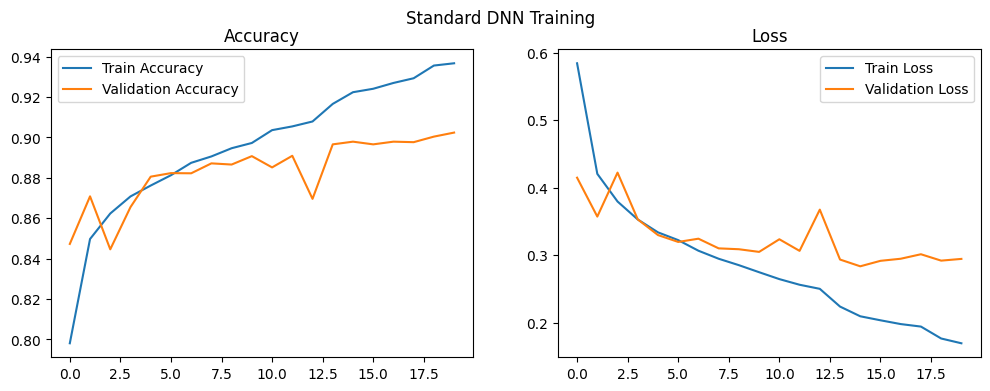

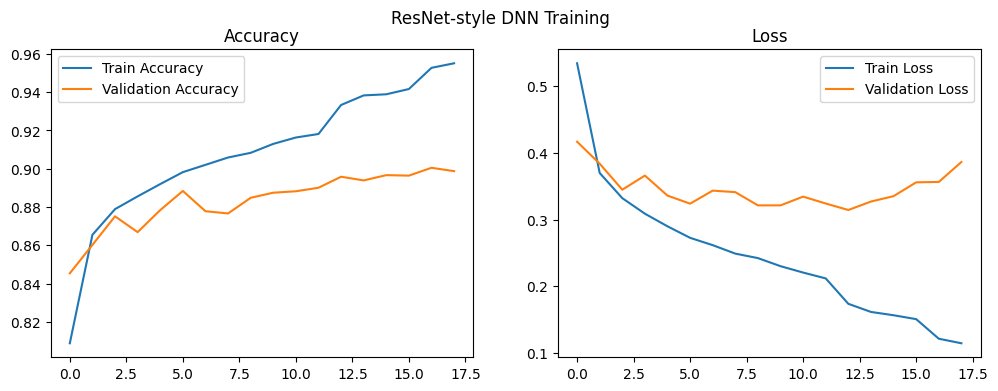

In [8]:
plot_history(dnn_history, 'Standard DNN Training')
plot_history(resnet_history, 'ResNet-style DNN Training')

In [9]:
# Evaluate on test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

In [10]:
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8960
ResNet-style DNN Test Accuracy: 0.8913



Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


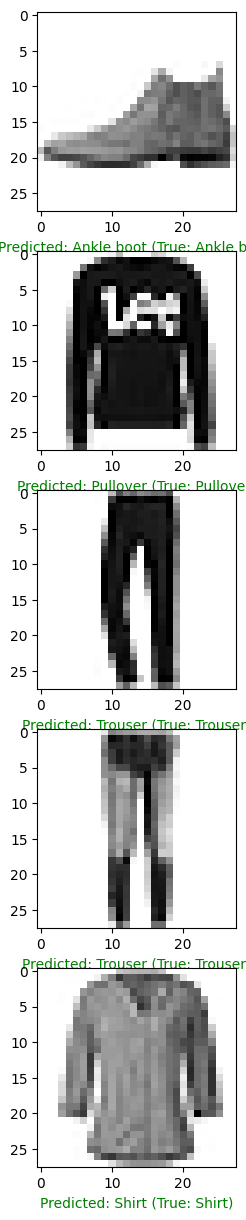


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


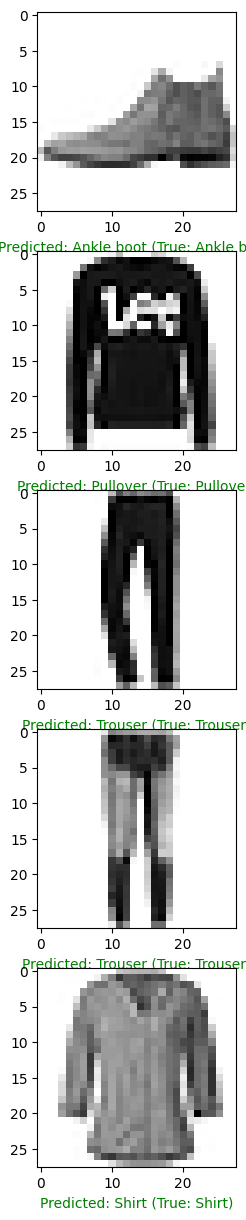

In [11]:
# Make predictions and visualize some results
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)